In [17]:
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torch import optim
import pandas as pd
import matplotlib.pyplot as plt

# 1-Dataset

In [18]:
#实现数据集，都是这种写法，继承dataset，实现类，其中包含这三个函数
class MinistDataset(Dataset): #自定义dataset,需要继承自pytorch提供的Dataset类
    def __init__(self, filename): #初始化
        self.data = pd.read_csv(filename) #转换成属性

    def __len__(self):
        
        return self.data.shape[0] #返回数据长度,只有加上这个才可以获得数据长度

    def __getitem__(self, idx): # 使数据能够进行索引
        I = self.data.iloc[idx]
        label = I[0]
        img = I[1:].to_numpy().reshape(28,28)
        img = torch.from_numpy(img) # 输出tensor
        return img, label #最终输出结果包括图像tensor和lable，二者是一个元组

In [19]:
# 训练集和测试集
train_dataset = MinistDataset(r'E:\ZhangXueHuan\Projects\data\Minist\mnist_train.csv')
test_dataset = MinistDataset(r'E:\ZhangXueHuan\Projects\data\Minist\mnist_test.csv')

## 1.1 实例化代码+图形显示

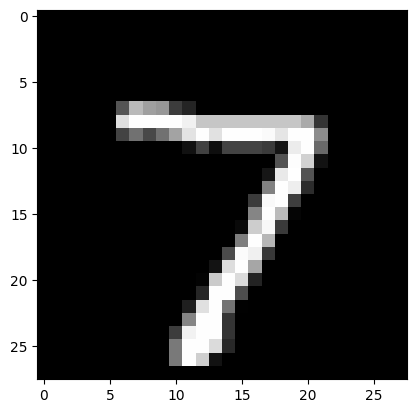

In [21]:
dataset = MinistDataset(r'E:\ZhangXueHuan\Projects\data\Minist\mnist_test.csv')
img = dataset[0][0].numpy()
plt.imshow(img,cmap='gray')

# 2-Dataloader

In [22]:
BATCH_SIZE = 64
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True) # batch_size,随机梯度下降中的样本量，损失函数的梯度，小批量梯度下降
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)# shuffle打乱顺序,一般训练的时候设置为true,测试的时候设置为false

# 3-Network

In [56]:
class NeuralNetwork(nn.Module): #继承自nn.Module
    def __init__(self):
        super(NeuralNetwork, self).__init__() #调用父类的初始化函数，一定要写
        self.flatten = nn.Flatten()
        self.w1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.w2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.w3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.flatten(x) # 维度是 (64*784)
        x1 = self.w1(x)  #维度是 (64*512)
        x1 = self.relu1(x1)
        x2 = self.w2(x1) #维度是 (64*512)
        x2 = self.relu2(x2)
        x3 = self.w3(x2) #维度是 (64*10)
        return x3

In [57]:
model = NeuralNetwork()
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (w1): Linear(in_features=784, out_features=512, bias=True)
  (relu1): ReLU()
  (w2): Linear(in_features=512, out_features=512, bias=True)
  (relu2): ReLU()
  (w3): Linear(in_features=512, out_features=10, bias=True)
)


# 4-Loss

In [58]:
lossfn = nn.CrossEntropyLoss() # 里面包含softmax,多分类用softmax结束

# 5-Optimizer

In [59]:
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# 6-Training

In [60]:
EPOCHES = 30
losses = []
for i in range(EPOCHES):
    for img, label in train_dataloader:
        img = img.float()
        preds = model.forward(img)
        loss = lossfn(preds, label)
        # backforward
        optimizer.zero_grad() #每一步反向传播之前需要清零梯度
        loss.backward() #求导
        optimizer.step() #梯度下降
    losses.append(loss.item())
    print(f'Epoch: {i}, Loss: {loss.item()}')

Epoch: 0, Loss: 0.08889316022396088
Epoch: 1, Loss: 0.009032298810780048
Epoch: 2, Loss: 0.012695902027189732
Epoch: 3, Loss: 0.0461934357881546
Epoch: 4, Loss: 0.010200911201536655
Epoch: 5, Loss: 0.04269098490476608
Epoch: 6, Loss: 0.0010353873949497938
Epoch: 7, Loss: 0.0015417846152558923
Epoch: 8, Loss: 0.000332112074829638
Epoch: 9, Loss: 6.458220013882965e-05
Epoch: 10, Loss: 0.0010066889226436615
Epoch: 11, Loss: 7.263342558871955e-05
Epoch: 12, Loss: 5.723915091948584e-05
Epoch: 13, Loss: 0.0003767212911043316
Epoch: 14, Loss: 0.0003650240832939744
Epoch: 15, Loss: 0.0002541272551752627
Epoch: 16, Loss: 0.00023909831361379474
Epoch: 17, Loss: 5.106913158670068e-05
Epoch: 18, Loss: 5.341948053683154e-05
Epoch: 19, Loss: 1.7261621906072833e-05
Epoch: 20, Loss: 2.546813993831165e-05
Epoch: 21, Loss: 0.00021088293578941375
Epoch: 22, Loss: 8.490209438605234e-05
Epoch: 23, Loss: 0.00010880733316298574
Epoch: 24, Loss: 0.00013416557339951396
Epoch: 25, Loss: 0.0001070144135155715
Ep

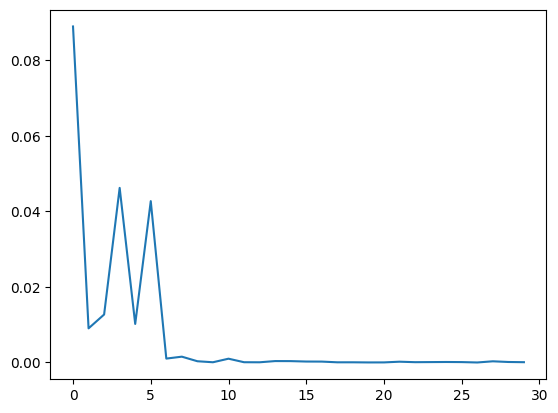

In [61]:
plt.plot(range(EPOCHES),losses)

# Test